### Importing the libraries


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics

### Reading the dataset

In [29]:
# renaming column as well
data = pd.read_csv('~/Desktop/glass.data', header = None, names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])


In [30]:
# first five rows of dataset
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
# dropping the id column
data.drop(columns = ['Id'], inplace = True, axis = 1)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Exploratory data analysis

In [34]:
# checking shape of dataset
df.shape

(214, 9)

In [35]:
# checking datatypes of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [36]:
# checking 0 values in all columns
df.all()
# no 0 values in any features

RI    False
Na    False
Mg    False
Al    False
Si    False
K     False
Ca    False
Ba    False
Fe    False
dtype: bool

In [37]:
# checking null values in all columns
df.isnull().sum()
# no null values in any features

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

<AxesSubplot:>

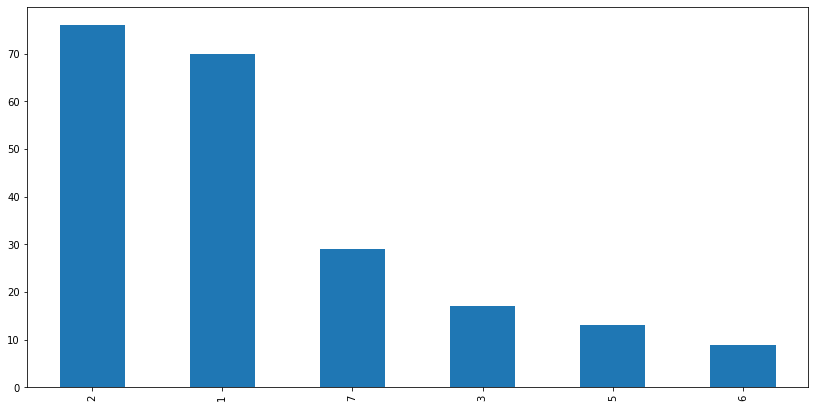

In [32]:
# Looking at the different types of glass (target)¶
# Type of glass: (class attribute)
# -- 1 building_windows_float_processed
# -- 2 building_windows_non_float_processed
# -- 3 vehicle_windows_float_processed
# -- 4 vehicle_windows_non_float_processed (none in this database)
# -- 5 containers
# -- 6 tableware
# -- 7 headlamps

fig, ax = plt.subplots(figsize = (14, 7))
data['Type'].value_counts().plot(kind = 'bar', ax = ax)


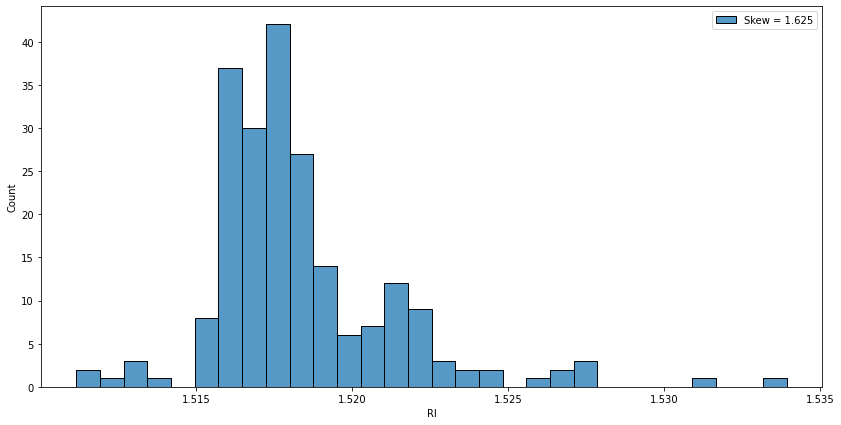

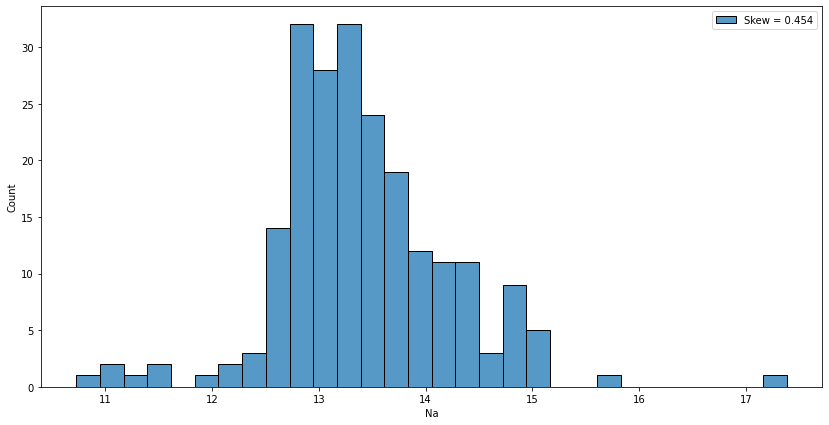

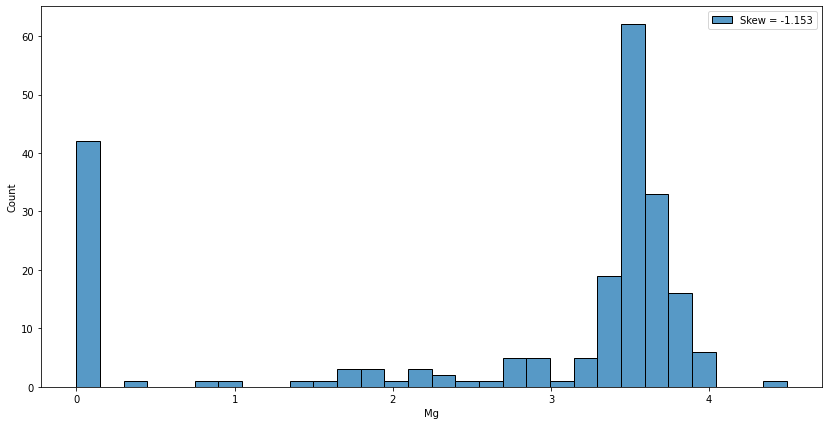

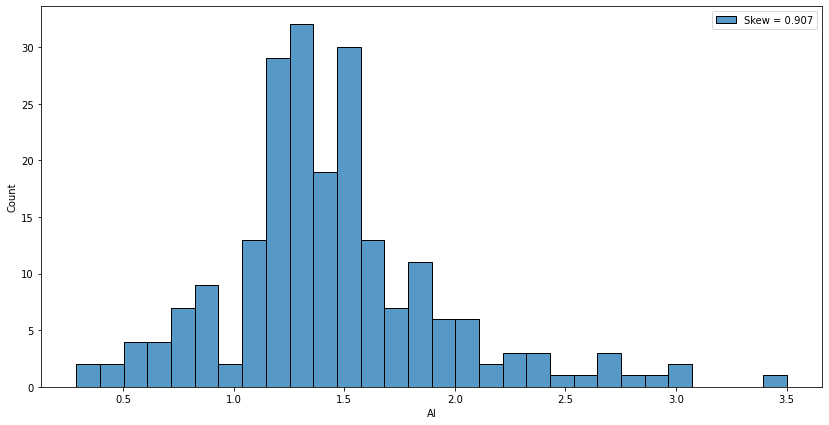

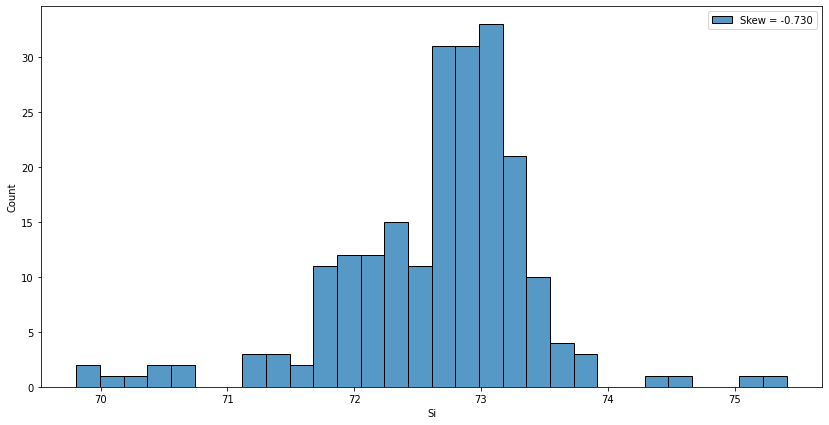

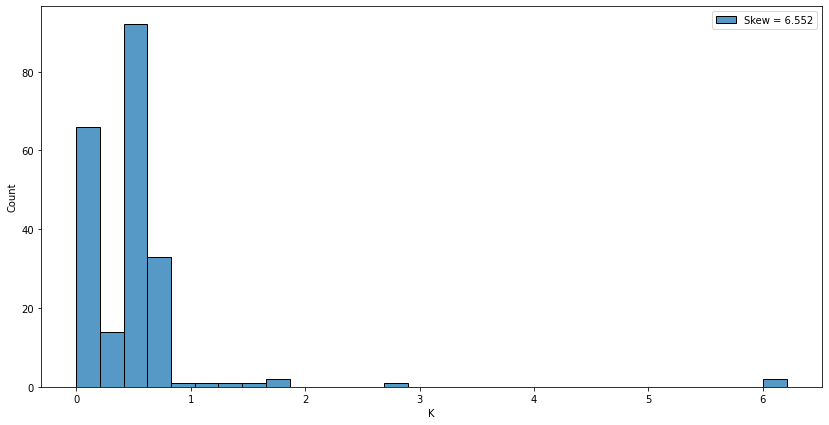

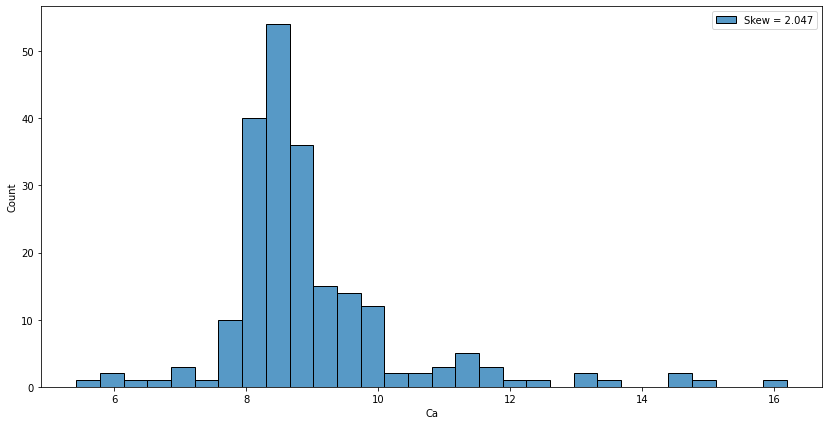

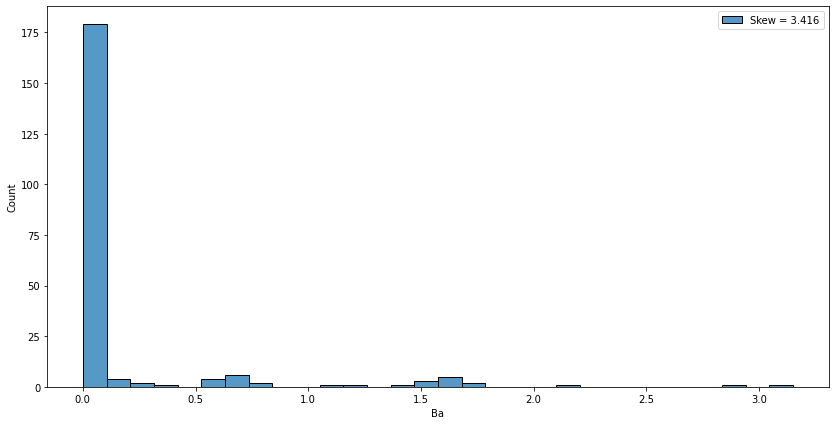

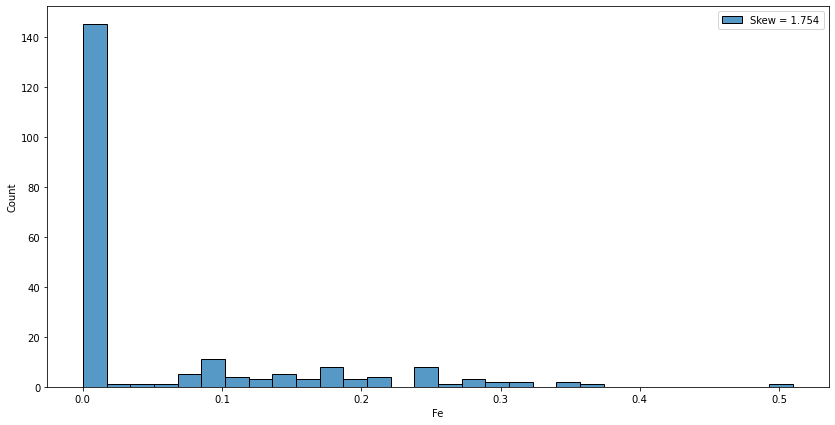

In [33]:
# Looking at the distribution of individual feature (Skewness)

features = data.columns[:-1].tolist()
for feature in features:
    fig, ax = plt.subplots(figsize = (14, 7))

    skew = data[feature].skew()
    
    sns.histplot(data[feature], kde= False, 
                 label='Skew = %.3f' %(skew),
                 bins=30, ax = ax)
    
    plt.legend(loc='best')
    plt.show()

# RI is right skewed
# Na is right skewed mostly
# Mg is slightly left skewed
# Al is slightly right skewed
# Si is slightli left skewed
# Ca is right skewed

<AxesSubplot:>

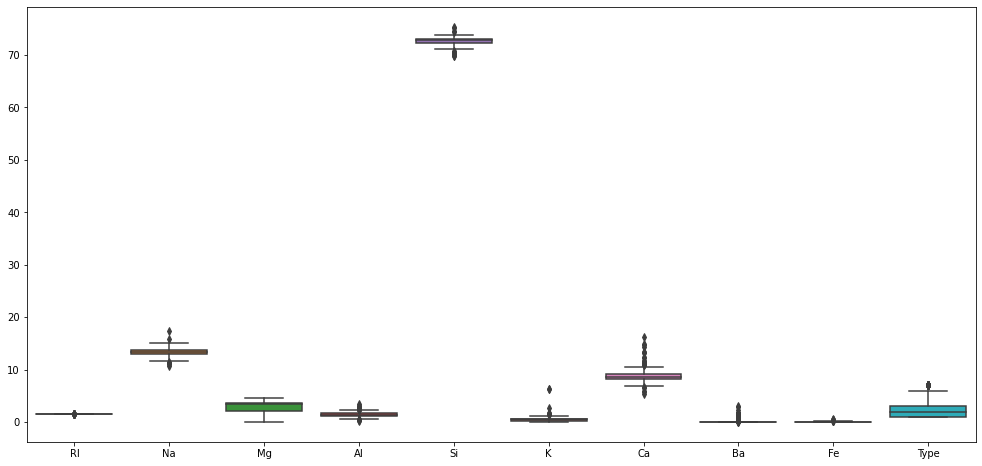

In [38]:
# boxplot of the features
fig, ax = plt.subplots(figsize = (17, 8))
sns.boxplot(data = data, ax = ax)

In [39]:
# scaling the data for a better view

In [40]:
def minMaxScale(df):
    temp_df = df.copy()
    
    for feature in df.columns:
        max_val = temp_df[feature].max()
        min_val = temp_df[feature].min()
        
        temp_df[feature] = (df[feature] - min_val) / (max_val - min_val)
        
    return temp_df

df = minMaxScale(data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]) # scaling all features except the target feature


<AxesSubplot:>

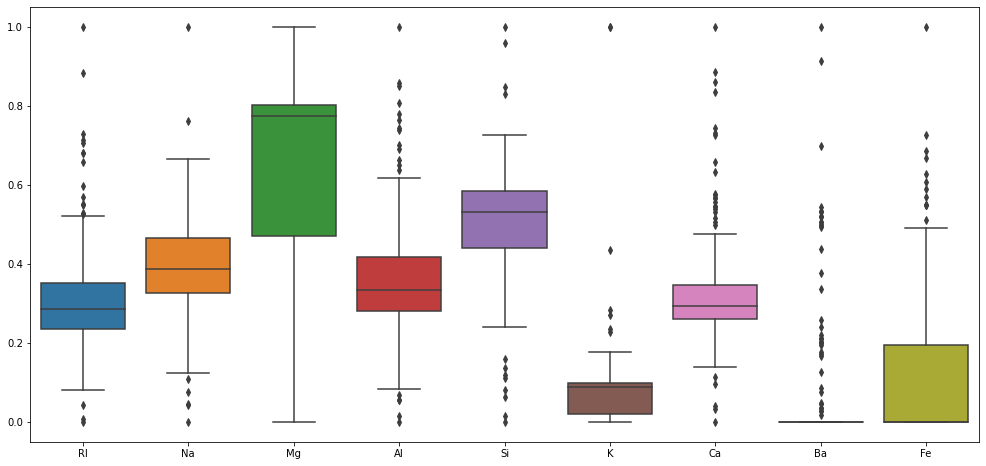

In [42]:
# boxplot of the features
fig, ax = plt.subplots(figsize = (17, 8))
sns.boxplot(data = df, ax = ax)

# a lot of outliers are present in all the features

In [43]:
# concat the dataframes with scaled data and target column
data = pd.concat([df, data[['Type']]], axis = 1)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


In [16]:
# treating the outliers

# Takes a dataframe df of features and returns a list of the indices corresponding to the observations containing more than 2 outliers. 

def TreatOutliers(df):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_bound = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_bound) | (df[col] > Q3 + outlier_bound)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

        return multiple_outliers  
        

In [17]:
print('The dataset contains %d observations with more than 2 outliers' %(len(TreatOutliers(data))))
# thus the number of outliers are not much

The dataset contains 0 observations with more than 2 outliers


<Figure size 1008x504 with 0 Axes>

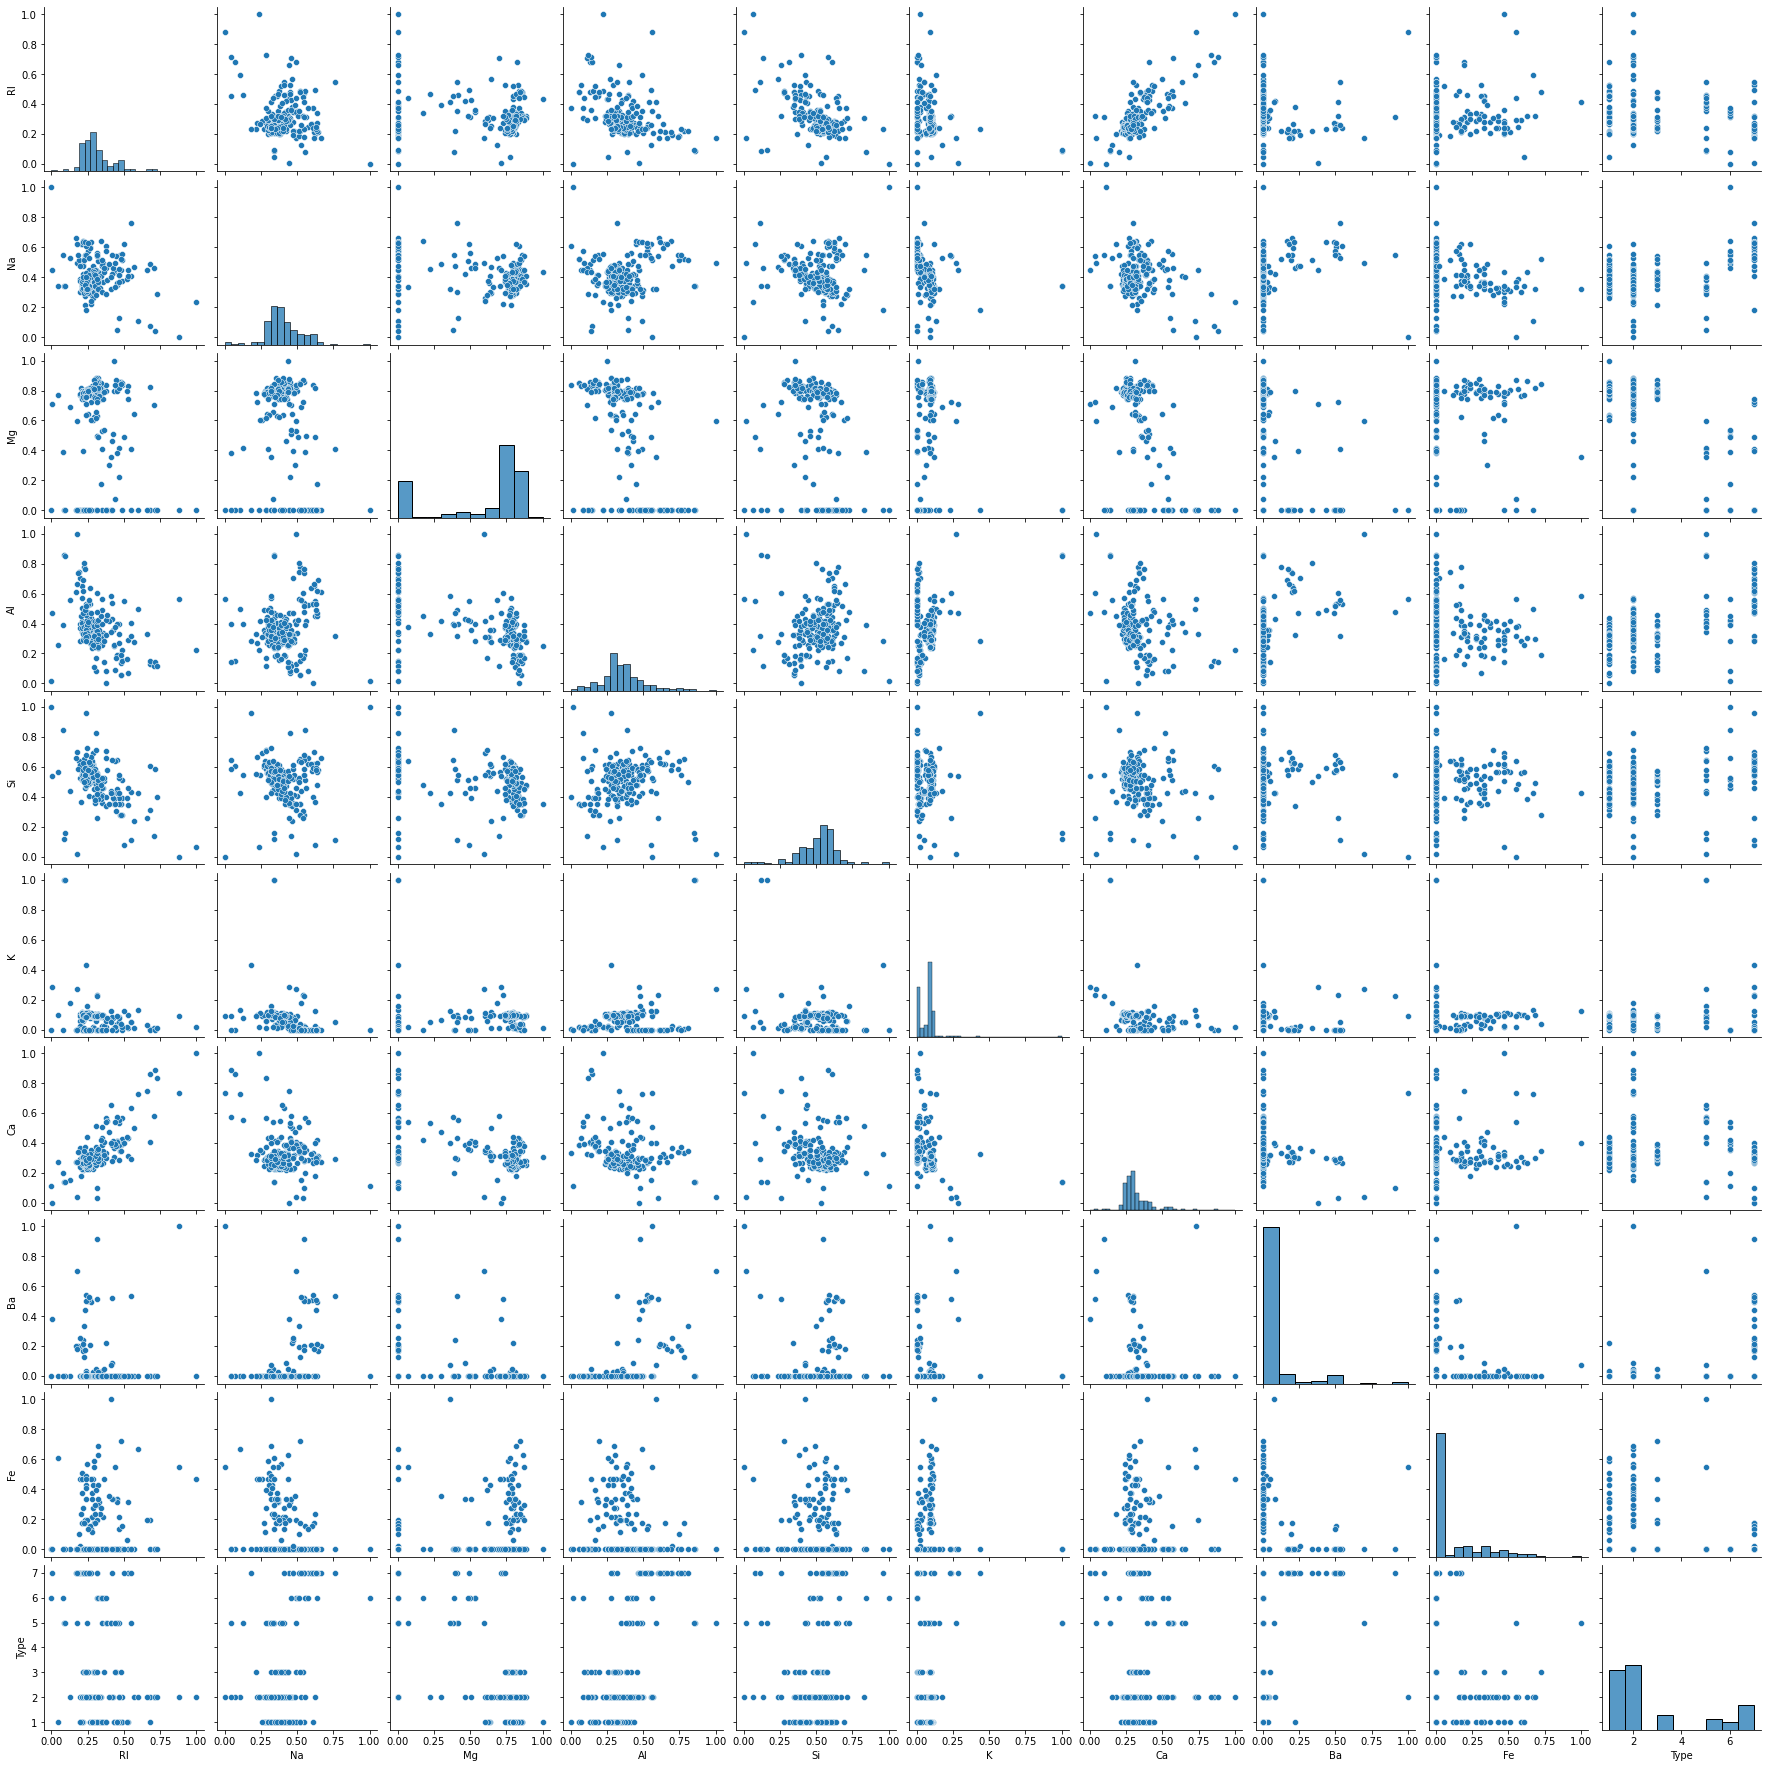

In [18]:
# plotting different features in the pairplot category
plt.figure(figsize=(14, 7))
sns.pairplot(data, palette='coolwarm')
plt.show();

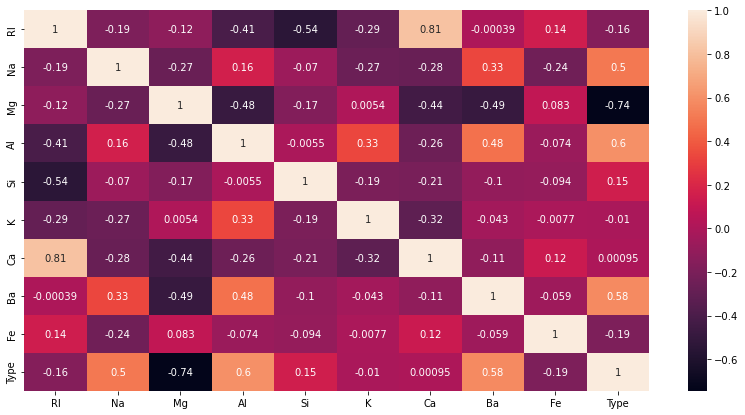

In [19]:
# Checking correlation of features with target variable

plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True);


In [44]:
# Correlation between Refractive Index and Calcium is high.
# Since Ca has very less correlation with target variable we can remove Ca and keep RI (Refractive Index)

### Model Creation

In [20]:
# The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. 
# In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

# Logistic Regression : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
# In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [21]:
X = data.iloc[:, :-1]
y = data[['Type']]

# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) # Split the dataset into 80:20 ratio
# X_train and y_train are the trainning datasets
# X_test and y_test are the testing datasets

Shape of training sample (171, 9)
Shape of test sample (43, 9)


In [45]:
### printing shapes of train and test datasets
print("Shape of training sample {}".format(X_train.shape))
print("Shape of test sample {}".format(X_test.shape))

Shape of training sample (171, 9)
Shape of test sample (43, 9)


In [22]:
# Making object of model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

model.score(X_test, y_test)

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5813953488372093

In [23]:
# predicting results for X_Test
y_pred = model.predict(X_test)

In [24]:
print('Accuracy of Logistic Regression Model:', metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.5813953488372093


In [48]:
precesion = metrics.recall_score(y_test,y_pred,average = "weighted")
print('Precesion of Logistic Regression Model:', precesion)

Precesion of Logistic Regression Model: 0.5887949260042283


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
recall = metrics.precision_score(y_test,y_pred,average = "weighted")
print('Recall of Logistic Regression Model:', precesion)

Recall of Logistic Regression Model: 0.5887949260042283


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
f1_score = metrics.f1_score(y_test,y_pred,average = "weighted")
print('F1 score of Logistic Regression Model:', f1_score)

F1 score of Logistic Regression Model: 0.5601328903654484


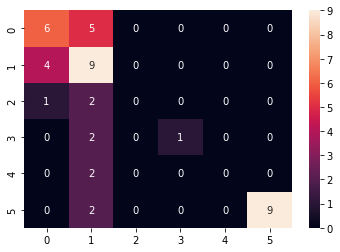

In [51]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,
            fmt='.0f')
plt.show()